# Time Series Analysis 
## Bike demand forecasting in Seul 

Data Source: https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand

In [59]:
# import packages 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

#read in file 
data = pd.read_csv('SeoulBikeData.csv',encoding= 'unicode_escape')
#changign encoding due to error UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 12: invalid start byte
df = data

# Data Exploration


## Data types: 
Categorical variables : 
Quantitative variables: 

Univariate and Bivariate Analysis 

In [60]:
#checking the dataset 
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df['Hour'] = pd.to_timedelta(df['Hour'], unit = 'h')
df['Date Hour'] = df['Date']+df['Hour']


In [6]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Date Hour
0,2017-01-12,254,00:00:00,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-01-12 00:00:00
1,2017-01-12,204,01:00:00,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-01-12 01:00:00
2,2017-01-12,173,02:00:00,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-01-12 02:00:00
3,2017-01-12,107,03:00:00,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-01-12 03:00:00
4,2017-01-12,78,04:00:00,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-01-12 04:00:00


In [7]:
#Setting datetime as index
df.set_index(['Date Hour'], drop=False)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Date Hour
Date Hour,,,,,,,,,,,,,,,
2017-01-12 00:00:00,2017-01-12,254,00:00:00,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-01-12 00:00:00
2017-01-12 01:00:00,2017-01-12,204,01:00:00,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-01-12 01:00:00
2017-01-12 02:00:00,2017-01-12,173,02:00:00,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-01-12 02:00:00
2017-01-12 03:00:00,2017-01-12,107,03:00:00,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-01-12 03:00:00
2017-01-12 04:00:00,2017-01-12,78,04:00:00,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-01-12 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-30 19:00:00,2018-11-30,1003,19:00:00,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018-11-30 19:00:00
2018-11-30 20:00:00,2018-11-30,764,20:00:00,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018-11-30 20:00:00
2018-11-30 21:00:00,2018-11-30,694,21:00:00,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018-11-30 21:00:00


In [8]:
#check statistics:
df.describe(include = 'all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Date Hour
count,8760,8760.000000,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2,8760
top,2018-05-21 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes,2018-02-17 08:00:00
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465,1
first,2017-01-12 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-12 00:00:00
last,2018-12-11 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-12-11 23:00:00
mean,NaN,704.602055,0 days 11:30:00,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN,NaN
std,NaN,644.997468,0 days 06:55:21.294077,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN,NaN
min,NaN,0.000000,0 days 00:00:00,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,NaN,191.000000,0 days 05:45:00,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN


In [9]:
#checkign data types 
df.dtypes

Date                          datetime64[ns]
Rented Bike Count                      int64
Hour                         timedelta64[ns]
Temperature(°C)                      float64
Humidity(%)                            int64
Wind speed (m/s)                     float64
Visibility (10m)                       int64
Dew point temperature(°C)            float64
Solar Radiation (MJ/m2)              float64
Rainfall(mm)                         float64
Snowfall (cm)                        float64
Seasons                               object
Holiday                               object
Functioning Day                       object
Date Hour                     datetime64[ns]
dtype: object

In [10]:
'''#Date convert to index 
#df.Date = pd.to_datetime(df.Date) #first convert to date
#df.set_index('Date', inplace=True) # convert to index 
sns.pairplot(df,
             hue='Rented Bike Count',
             x_vars=['Date'],
             y_vars='Rented Bike Count',
             height=5,
             plot_kws={'alpha':0.15, 'linewidth':0}
            )
#plt.suptitle('Power Use MW by Hour, Day of Week, Year and Week of Year')
plt.show()
'''

"#Date convert to index \n#df.Date = pd.to_datetime(df.Date) #first convert to date\n#df.set_index('Date', inplace=True) # convert to index \nsns.pairplot(df,\n             hue='Rented Bike Count',\n             x_vars=['Date'],\n             y_vars='Rented Bike Count',\n             height=5,\n             plot_kws={'alpha':0.15, 'linewidth':0}\n            )\n#plt.suptitle('Power Use MW by Hour, Day of Week, Year and Week of Year')\nplt.show()\n"

In [11]:
#check for duplicates 
df.duplicated().sum()

0

In [12]:
#Missing values
df.isnull().values.any()

False

# Data Visualisation 

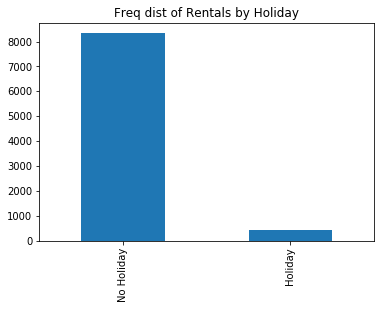

In [13]:
#Univariate Anallysis of categorical Data 
#cat_columns = df[['Seasons','Holiday', 'Functioning Day']]
rentals_by_season = df['Holiday'].value_counts().plot.bar(title='Freq dist of Rentals by Holiday')

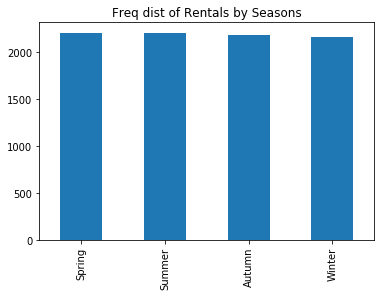

In [14]:
#Univariate Anallysis of categorical Data 
#cat_columns = df[['Seasons','Holiday', 'Functioning Day']]
rentals_by_season = df['Seasons'].value_counts().plot.bar(title='Freq dist of Rentals by Seasons')

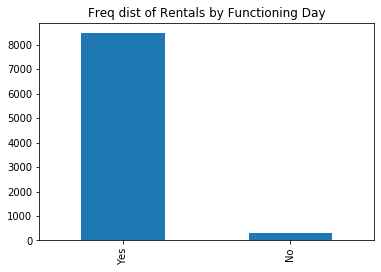

In [15]:
#Univariate Anallysis of categorical Data 
#cat_columns = df[['Seasons','Holiday', 'Functioning Day']]
rentals_by_season = df['Functioning Day'].value_counts().plot.bar(title='Freq dist of Rentals by Functioning Day')

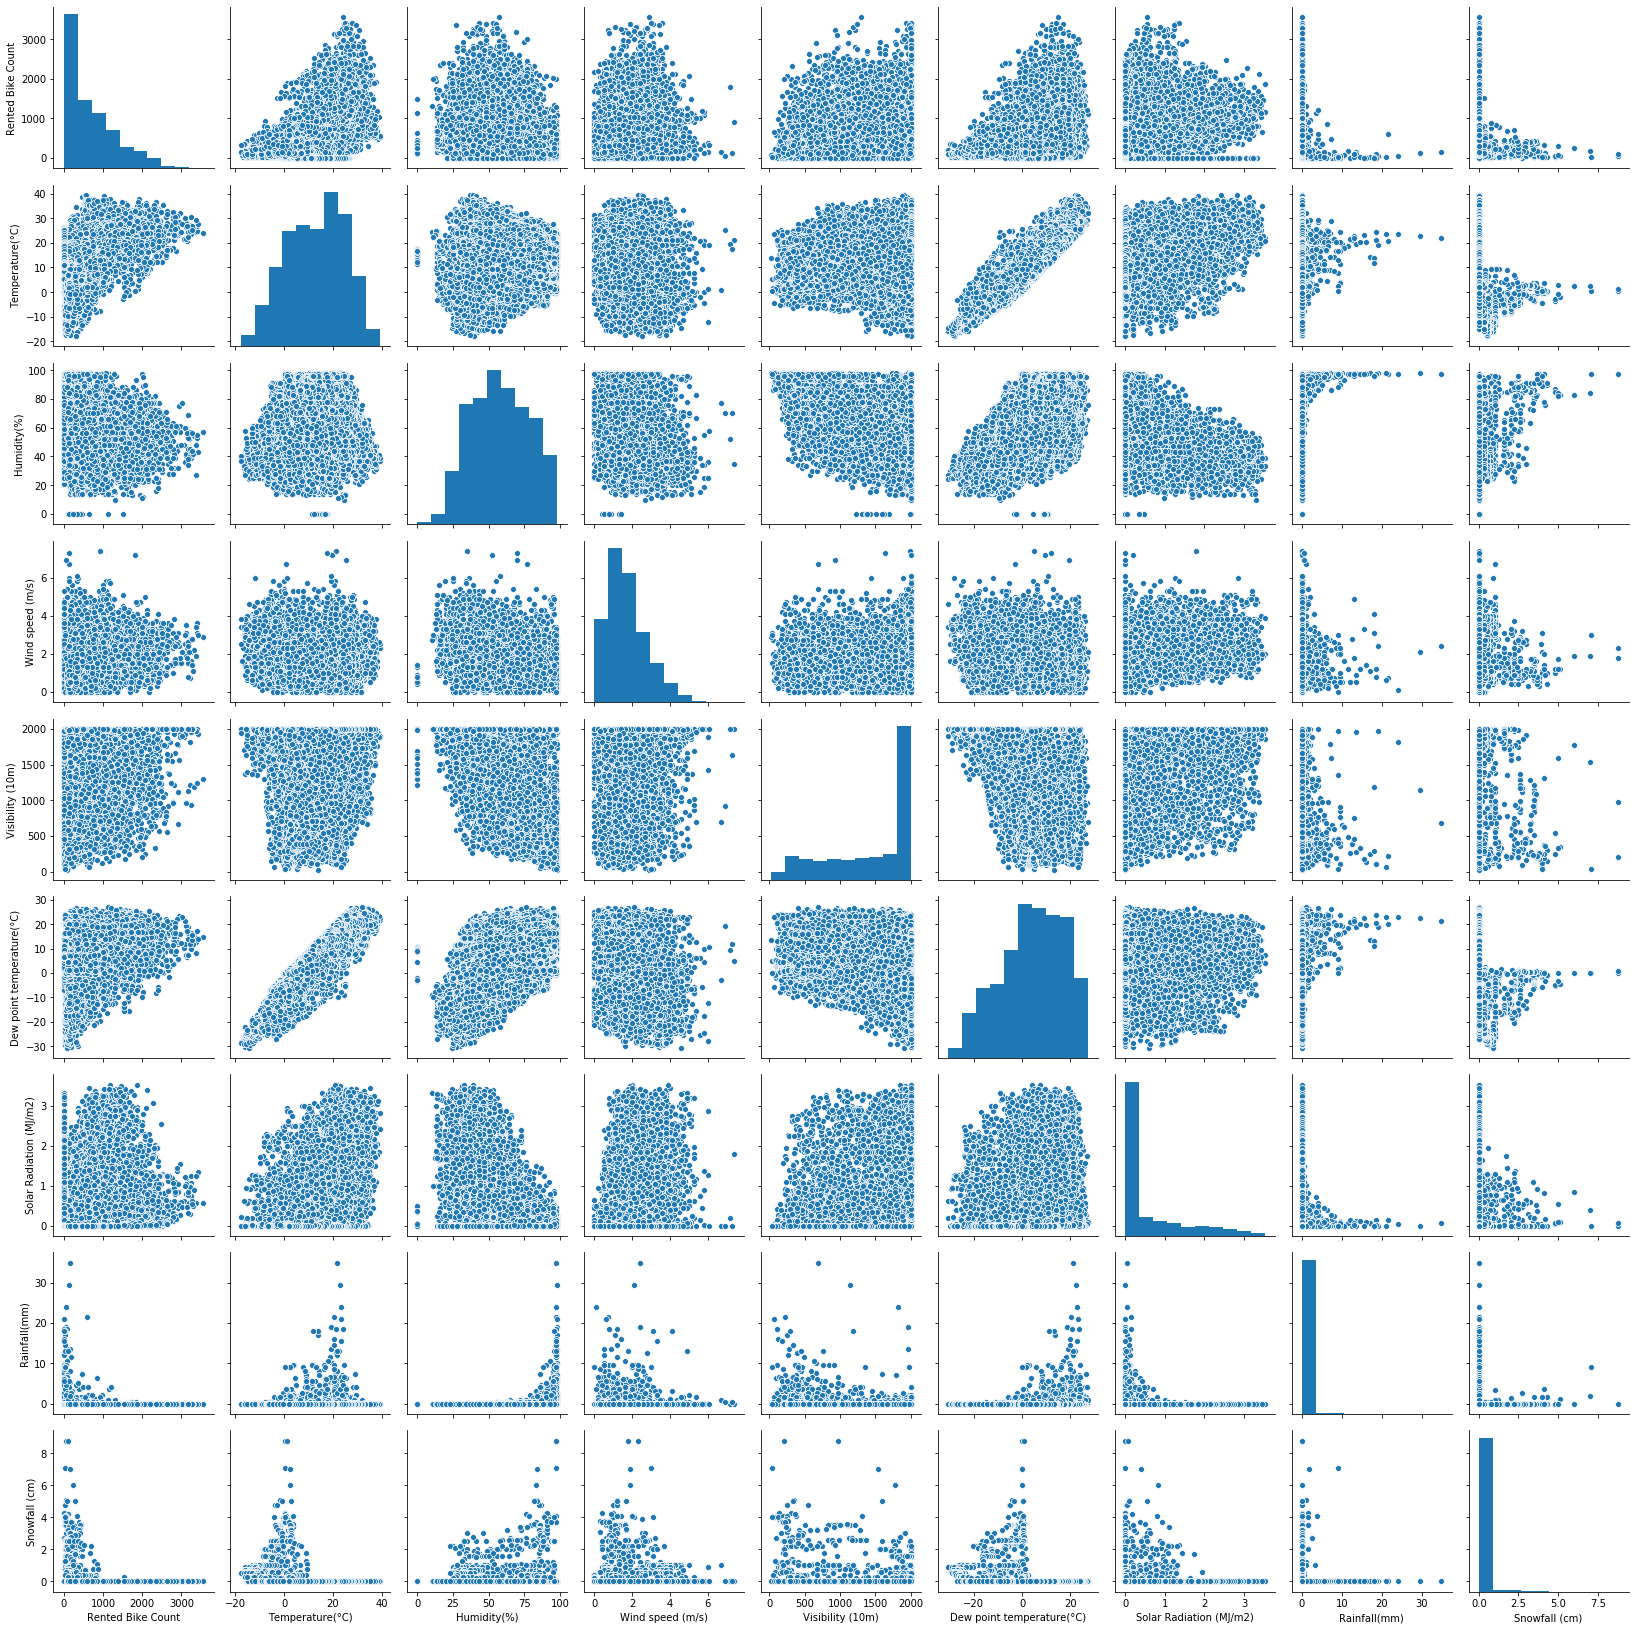

In [16]:
#bivariate plotting of numerical data 
num_columns = df[['Rented Bike Count','Hour','Temperature(°C)','Humidity(%)', 'Wind speed (m/s)','Visibility (10m)',
           'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']]
sns.pairplot(num_columns)

In [17]:
'''#Univariate analysis of numerical data 
fig, ax = plt.subplots(len(num_columns), figsize=(16,12))

for i, col_val in enumerate(num_columns):

    sns.distplot(df[num_columns], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+num_columns, fontsize=10)
    ax[i].set_xlabel(num_columns, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()'''

"#Univariate analysis of numerical data \nfig, ax = plt.subplots(len(num_columns), figsize=(16,12))\n\nfor i, col_val in enumerate(num_columns):\n\n    sns.distplot(df[num_columns], hist=True, ax=ax[i])\n    ax[i].set_title('Freq dist '+num_columns, fontsize=10)\n    ax[i].set_xlabel(num_columns, fontsize=8)\n    ax[i].set_ylabel('Count', fontsize=8)\n\nplt.show()"

In [18]:
#checking for highly correlated data 
corr = hist.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values)

NameError: name 'hist' is not defined

In [55]:
## chckign for seasonality 
#A TS is said to be stationary if its statistical properties such as mean, variance remain constant over time. 
##ts = df[['Date','Rented Bike Count']]      
##plot(ts)
#dates = plt.dates.date2num(df['Date'])
#plt.plot_date(dates, df['Rented Bike Count'])
df['Date Hour'] = pd.to_datetime(df['Date Hour'])
#ts == df[['Rented Bike Count','Date Hour']]
#ts.plot()
df[['Rented Bike Count','Date Hour']].plot()

ValueError: view limit minimum -36851.99791666667 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

[Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '11'),
 Text(0, 0, '12'),
 Text(0, 0, '13'),
 Text(0, 0, '14'),
 Text(0, 0, '15'),
 Text(0, 0, '16'),
 Text(0, 0, '17'),
 Text(0, 0, '18'),
 Text(0, 0, '19'),
 Text(0, 0, '20'),
 Text(0, 0, '21'),
 Text(0, 0, '22'),
 Text(0, 0, '23')]

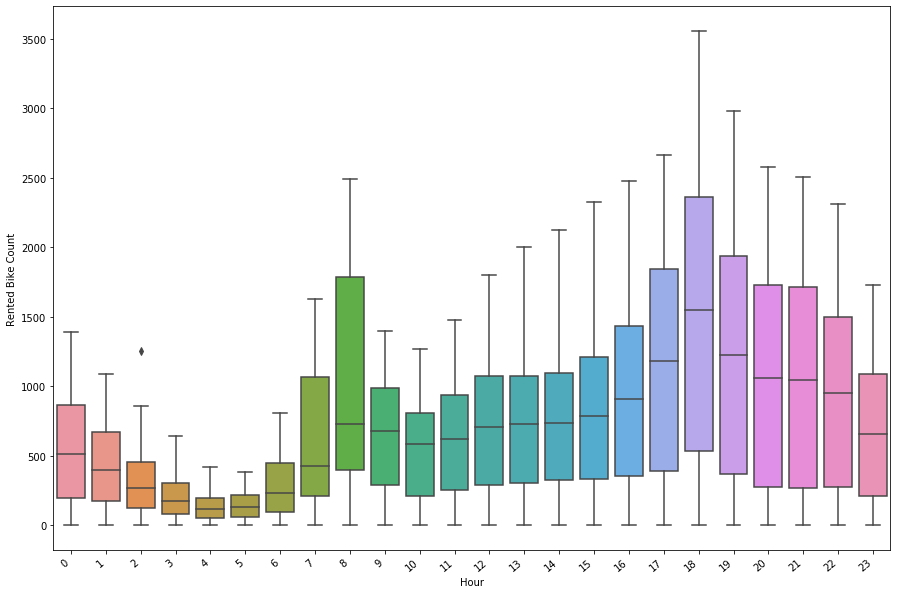

In [63]:
plt.figure(figsize=(15, 10))
viz = sns.boxplot(data=data,x="Hour", y="Rented Bike Count")
viz.set_xticklabels(viz.get_xticklabels(), rotation=40, ha="right")

In [ ]:
plt.figure(figsize=(15, 10))
viz = sns.boxplot(data=data,x="Hour", y="Rented Bike Count")
viz.set_xticklabels(viz.get_xticklabels(), rotation=40, ha="right")